In [39]:

##Importing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Plant Weather Data
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv') 


In [40]:

print('Plant ID ',df_gen.PLANT_ID.nunique())
print('No. of Inverters ',df_gen.SOURCE_KEY.nunique())
print('No. of Unique Source key',df_weather.SOURCE_KEY.nunique())
print('Null values in generation data: \n',df_gen.isnull().sum())
print('Null values in generation data: \n',df_weather.isnull().sum()) 

Plant ID  1
No. of Inverters  22
No. of Unique Source key 1
Null values in generation data: 
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
Null values in generation data: 
 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [41]:
#Dropping PLANT_ID 
df_gen.drop('PLANT_ID', axis=1, inplace=True)
df_weather.drop('PLANT_ID', axis = 1, inplace=True)

## Mapping
Inverter_labels = {inverter_no:inverter_name for inverter_name,inverter_no in enumerate(df_gen['SOURCE_KEY'].unique(),1)}
df_gen['Inverter_No'] = df_gen['SOURCE_KEY'].map(Inverter_labels) 

## Drop Source Key after replacing with inverter numbers
df_gen.drop('SOURCE_KEY',axis=1,inplace=True)
df_weather.drop('SOURCE_KEY',axis=1,inplace=True) 
#Reordering and dropping Daily yield and Total yield
df_gen = df_gen[['DATE_TIME','Inverter_No' ,'DC_POWER', 'AC_POWER']]

In [42]:
print('Inverter {} has data for {} timestamps(Minimum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmin()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))
print('Inverter {} has data for {} timestamps(Maximum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmax()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().max()))     
print('DIFFERENCE = {}'.format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().max() - 
                               df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))

Inverter 5 has data for 2355 timestamps(Minimum)
Inverter 2 has data for 3259 timestamps(Maximum)
DIFFERENCE = 904


In [43]:
df_gen

,DATE_TIME,Inverter_No,DC_POWER,AC_POWER
0,2020-05-15 00:00:00,1,0.0,0.0
1,2020-05-15 00:00:00,2,0.0,0.0
2,2020-05-15 00:00:00,3,0.0,0.0
3,2020-05-15 00:00:00,4,0.0,0.0
4,2020-05-15 00:00:00,5,0.0,0.0
...,...,...,...,...
67693,2020-06-17 23:45:00,18,0.0,0.0
67694,2020-06-17 23:45:00,19,0.0,0.0
67695,2020-06-17 23:45:00,20,0.0,0.0
67696,2020-06-17 23:45:00,21,0.0,0.0


In [44]:
import pandas as pd
from functools import reduce

# Assuming df_gen is your main dataframe containing 'Inverter_No', 'DATE_TIME', 'DC_POWER', 'AC_POWER'
# Grouping the data by 'Inverter_No'
grouped = df_gen.groupby('Inverter_No')

# Creating a list of dataframes, each corresponding to a unique Inverter group
dfs = []
for i, inverter_no in enumerate(df_gen['Inverter_No'].unique(), 1):
    df_group = grouped.get_group(inverter_no).copy()
    
    # Rename the columns for each inverter (to avoid conflicts when merging)
    df_group.rename(columns={
        'DC_POWER': f'DC_POWER_{i}',
        'AC_POWER': f'AC_POWER_{i}',
        'Inverter_No': f'Inverter_No_{i}'
    }, inplace=True)
    
    dfs.append(df_group)

# Performing the merge operation using 'reduce' and 'pd.merge'
df_new = reduce(lambda left, right: pd.merge(left, right, on=['DATE_TIME'], how='outer'), dfs)

# Displaying the final merged dataframe
display(df_new)

# Verify the column names
print(df_new.columns)







,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,...,AC_POWER_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,Inverter_No_22,DC_POWER_22,AC_POWER_22
0,2020-05-15 00:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
1,2020-05-15 00:15:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
2,2020-05-15 00:30:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
3,2020-05-15 00:45:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
4,2020-05-15 01:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-05-20 13:00:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1179.653333,20,1299.906667,1267.406667,NaN,NaN,NaN,22,0.0,0.0
3255,2020-05-20 13:15:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1173.713333,20,1286.700000,1254.526667,NaN,NaN,NaN,22,0.0,0.0
3256,2020-05-20 13:30:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1116.450000,20,1224.671429,1194.050000,NaN,NaN,NaN,22,0.0,0.0
3257,2020-05-20 13:45:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1095.706667,20,1200.953333,1170.946667,NaN,NaN,NaN,22,0.0,0.0


Index(['DATE_TIME', 'Inverter_No_1', 'DC_POWER_1', 'AC_POWER_1',
       'Inverter_No_2', 'DC_POWER_2', 'AC_POWER_2', 'Inverter_No_3',
       'DC_POWER_3', 'AC_POWER_3', 'Inverter_No_4', 'DC_POWER_4', 'AC_POWER_4',
       'Inverter_No_5', 'DC_POWER_5', 'AC_POWER_5', 'Inverter_No_6',
       'DC_POWER_6', 'AC_POWER_6', 'Inverter_No_7', 'DC_POWER_7', 'AC_POWER_7',
       'Inverter_No_8', 'DC_POWER_8', 'AC_POWER_8', 'Inverter_No_9',
       'DC_POWER_9', 'AC_POWER_9', 'Inverter_No_10', 'DC_POWER_10',
       'AC_POWER_10', 'Inverter_No_11', 'DC_POWER_11', 'AC_POWER_11',
       'Inverter_No_12', 'DC_POWER_12', 'AC_POWER_12', 'Inverter_No_13',
       'DC_POWER_13', 'AC_POWER_13', 'Inverter_No_14', 'DC_POWER_14',
       'AC_POWER_14', 'Inverter_No_15', 'DC_POWER_15', 'AC_POWER_15',
       'Inverter_No_16', 'DC_POWER_16', 'AC_POWER_16', 'Inverter_No_17',
       'DC_POWER_17', 'AC_POWER_17', 'Inverter_No_18', 'DC_POWER_18',
       'AC_POWER_18', 'Inverter_No_19', 'DC_POWER_19', 'AC_POWER_19',
    

In [45]:
df_weather['DATE_TIME'] = df_weather['DATE_TIME'].astype(str)
df_new['DATE_TIME'] = df_new['DATE_TIME'].astype(str)
#Merging Generation & Weather datasets
df = df_weather.merge(df_new,left_on='DATE_TIME',right_on='DATE_TIME',how='outer')
#Generating 15 min time blocks
tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')
tb=tb[:-1] 
ts = tb.strftime('%H:%M')
block_dict = {}
j=1
for i in range(len(ts)):
    block_dict[ts[i]] =  j
    j+=1

# Making new columns of Time,BLOCK and Date and droping DATE_TIME column
df['TIME'] = df['DATE_TIME'].apply(lambda x:str(x)[-8:-3])
df['DATE'] = pd.to_datetime(df['DATE_TIME']).dt.date
df['BLOCK'] = pd.to_datetime(df['TIME']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])
df.drop('DATE_TIME',axis=1,inplace=True)
#Saving the dictionary using numpy
np.save('timestamp_block_dictionary.npy',block_dict)

## Column re-ordering
cols = df.columns.tolist()
df = df[[cols[-1]]+[cols[-2]]+[cols[-3]]+cols[:-3]]

display(df)

,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Inverter_No_1,DC_POWER_1,AC_POWER_1,Inverter_No_2,...,AC_POWER_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,Inverter_No_22,DC_POWER_22,AC_POWER_22
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,92,2020-06-17,22:45,23.511703,22.856201,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3255,93,2020-06-17,23:00,23.482282,22.744190,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3256,94,2020-06-17,23:15,23.354743,22.492245,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3257,95,2020-06-17,23:30,23.291048,22.373909,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [46]:
#Getting last 3 days data 
last_3_days = df['DATE'].astype(str).unique()[-3:]
df_test = df[df['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])
#Saving Test data
df_test.reset_index(drop=True).to_csv('Test_data.csv')
#Saving all as Train for indexes not present in test data
df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('Train_data.csv')

## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

## Check for missing values
print('No. of missing values in train dataset: ',list(df_train.isnull().sum()))

Train: (2971, 72)
Test: (288, 72)
No. of missing values in train dataset:  [0, 0, 0, 0, 0, 0, 64, 64, 64, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 64, 64, 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 904, 904, 904, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 904, 904, 904, 0, 0, 0]


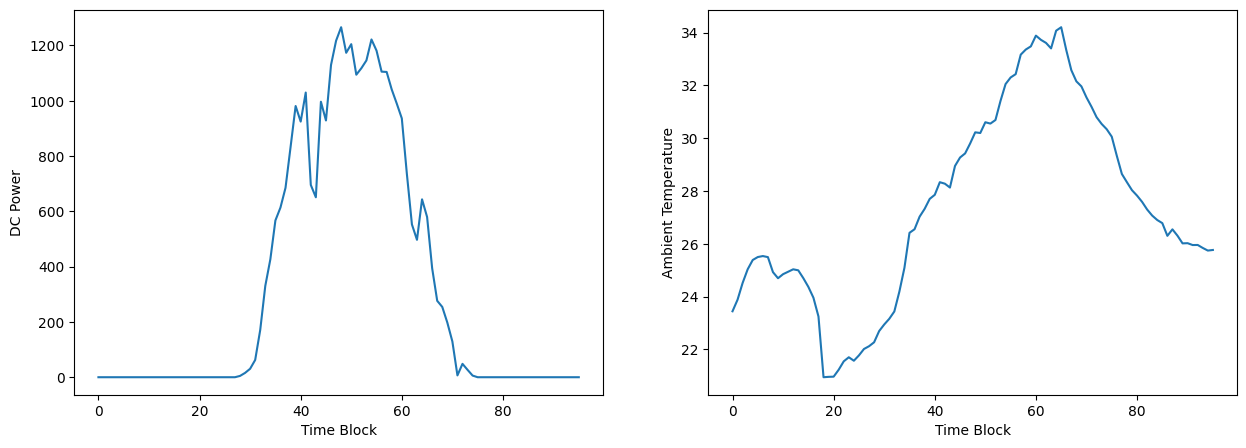

In [47]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['DC_POWER_1'])
ax2.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['AMBIENT_TEMPERATURE'])
ax1.set_xlabel('Time Block')
ax1.set_ylabel('DC Power')

ax2.set_xlabel('Time Block')
ax2.set_ylabel('Ambient Temperature')

plt.show()

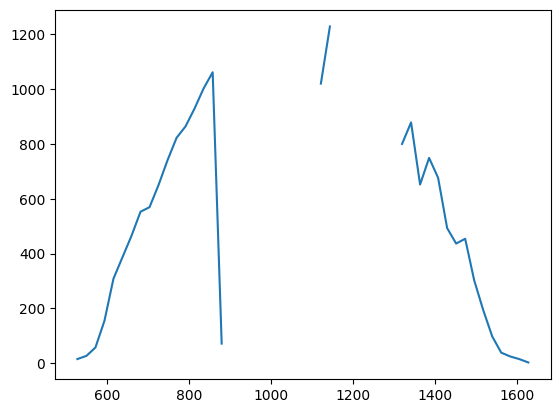

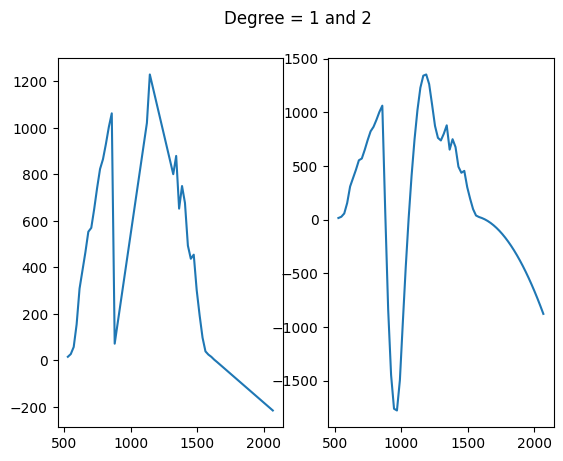

In [48]:
#Code for Plot 1
df2 = df_gen.copy() # Making a acopy 
df2['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date.astype(str)
## Selecting a date and replacing AC Power with NaN wherever its 0 and plotting 
indexes = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')&(df2['AC_POWER']==0)].index
df2.loc[indexes,'AC_POWER']=np.nan
df2 = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['AC_POWER']
df2.plot();

#Code for Plot 2
## Comparison between 1 & 2 degree splines
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Degree = 1 and 2')
ax1.plot(df2.interpolate(method='spline',order=1))
ax2.plot(df2.interpolate(method='spline',order=2));

In [49]:
day_only_columns=list()
#Will collect all names like DC_POWER_1, DC_POWER_2 and so on 
DC_cols = [i for i in df.columns if 'DC_POWER' in i]
AC_cols = [i for i in df.columns if 'AC_POWER' in i]
day_only_columns = DC_cols+AC_cols+["IRRADIATION"]

def Data_Preparation_Plant_Level(df):
    for col in day_only_columns:
        df[col] = df[col].astype(float)
        # For time except for non-generating hours(12 am to 6 am & 6 pm to 12 am) will be replaced by zero
        df.loc[df[(~((df['BLOCK']>24) & (df['BLOCK']<73))) & df[col].isnull()].index,col] = 0

    # Left NaN value for generating hours(6 am to 6pm) 
       
        #1.AC & DC columns
    df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
       #2.Left NaN values in Irradiation, Ambient Temp, Module Temp, Inverter_No
    df.interpolate(method='linear',inplace=True)
    
    # Summing up Inverter wise AC and DC values to reach Plant-level generation
    df['AC_POWER'] = df.loc[: ,AC_cols].sum(axis=1)
    df['DC_POWER'] = df.loc[:,DC_cols].sum(axis=1)
    #Scaling generation to MW from kW  
    df['AC_POWER'] = df['AC_POWER']/1000
    df['DC_POWER'] = df['DC_POWER']/1000
    
    return df
#Applying the function on Train & Test 
df_train = Data_Preparation_Plant_Level(df_train)
df_test = Data_Preparation_Plant_Level(df_test)

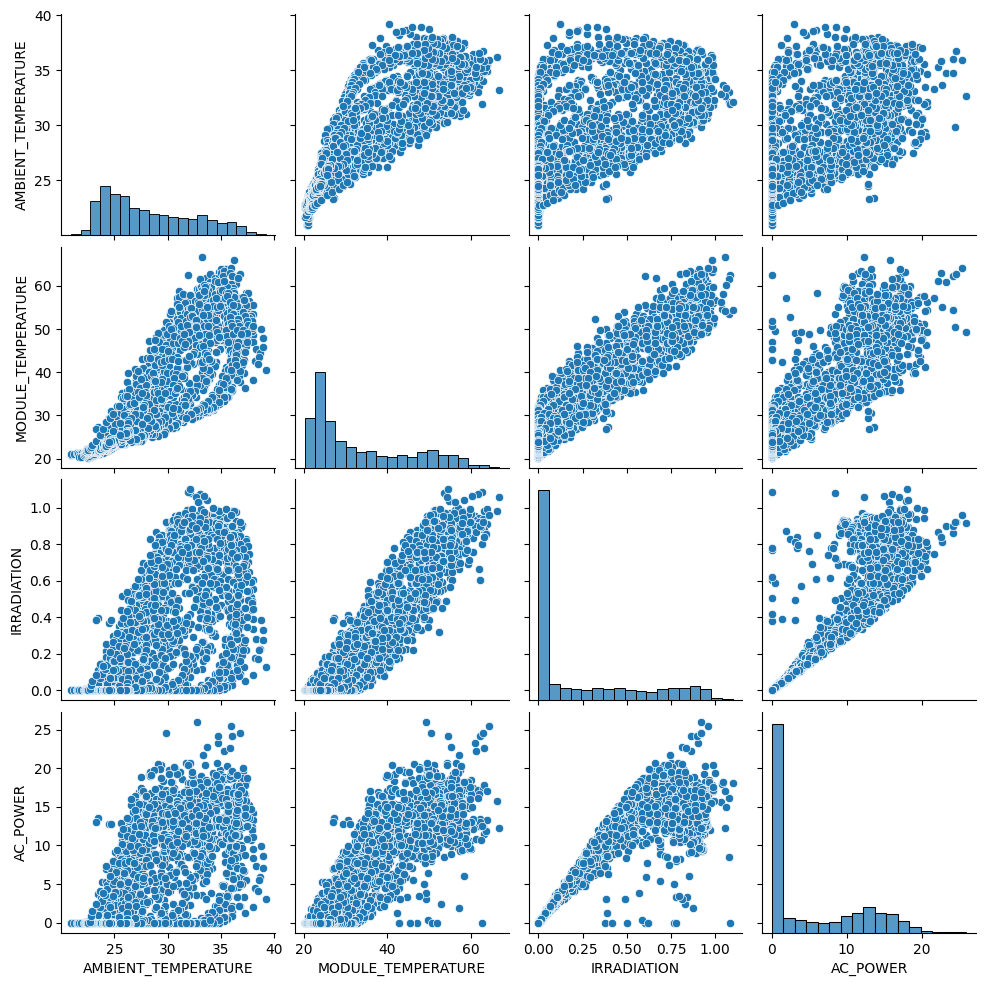

In [50]:
import seaborn as sns
sns.pairplot(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']],height=2.5)

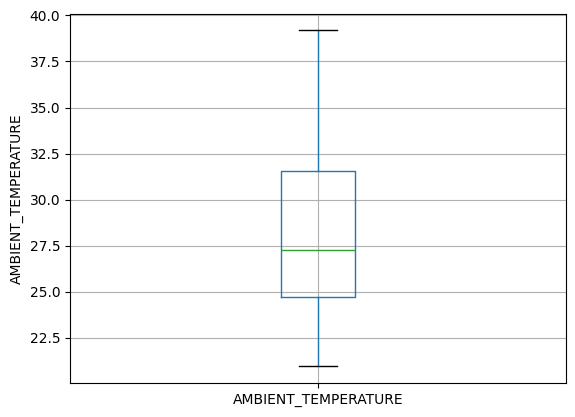

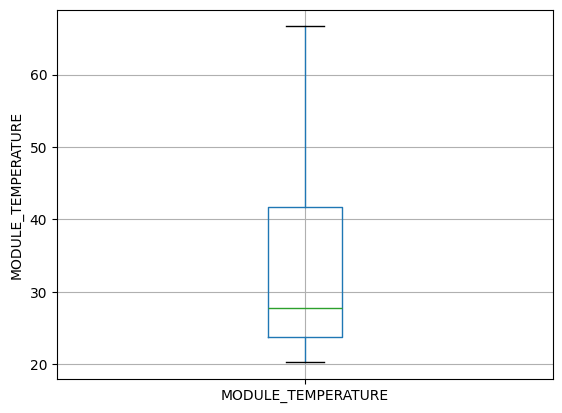

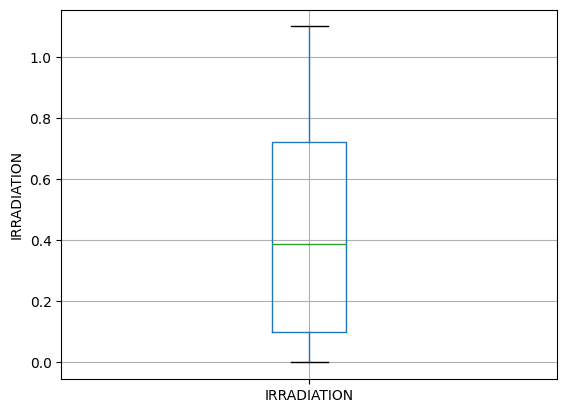

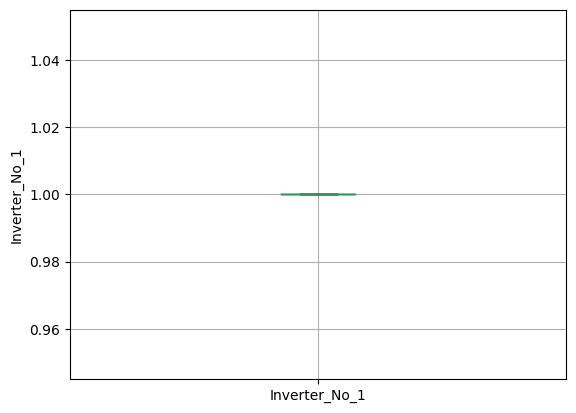

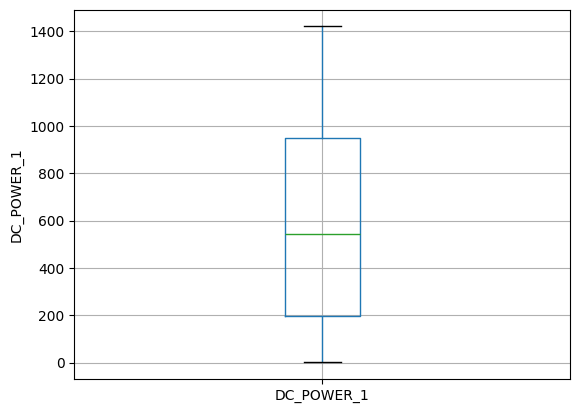

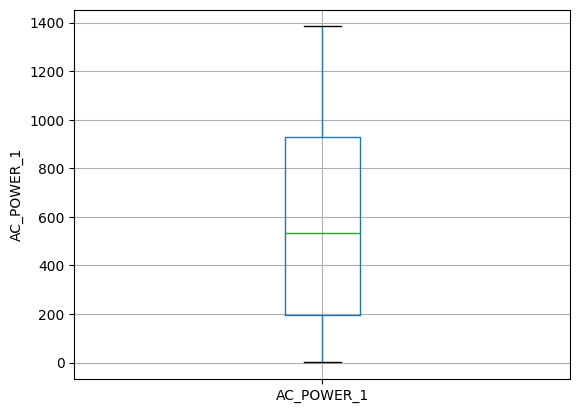

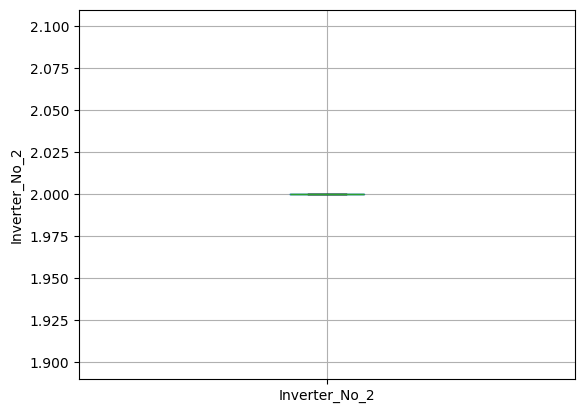

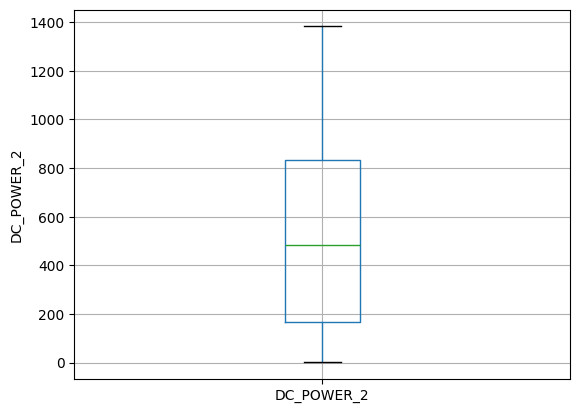

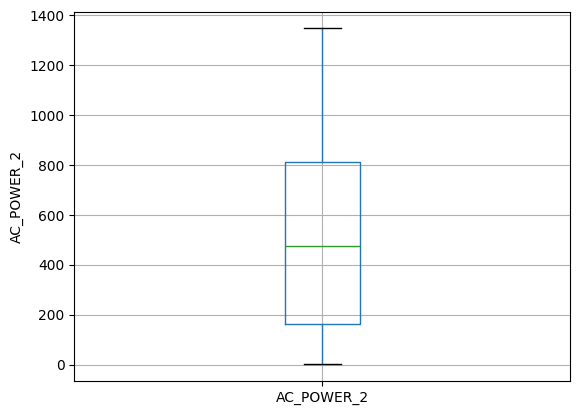

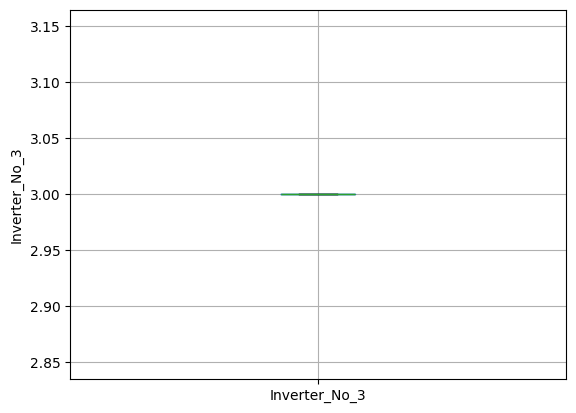

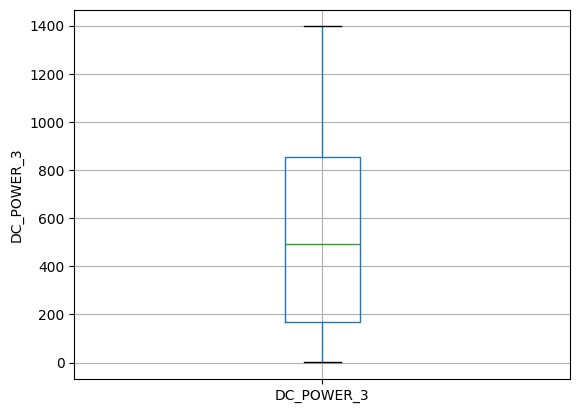

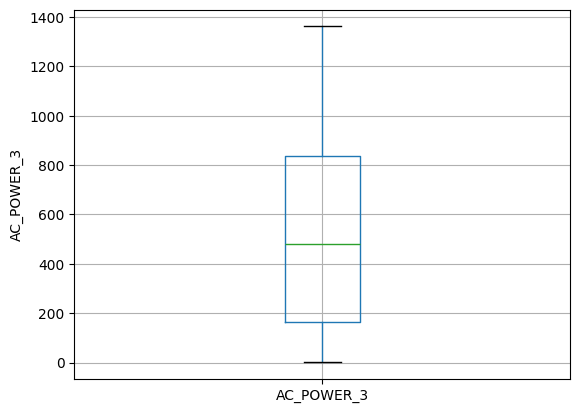

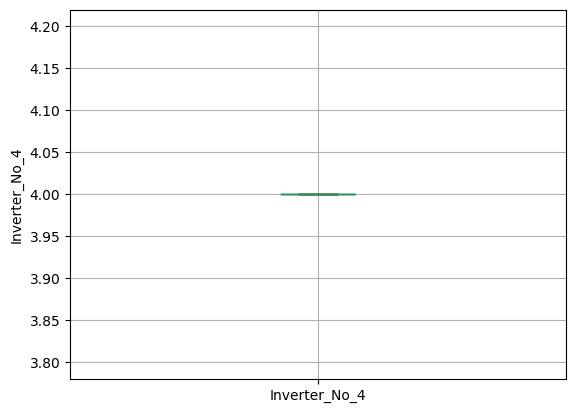

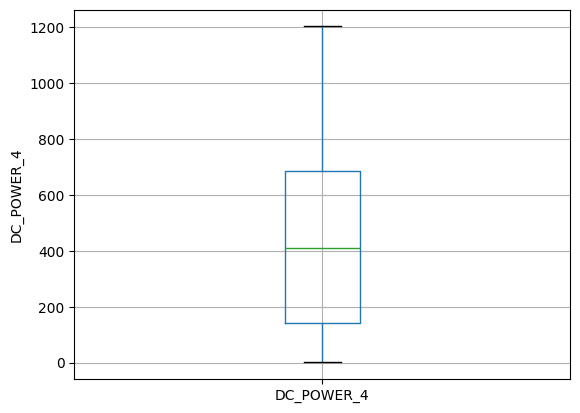

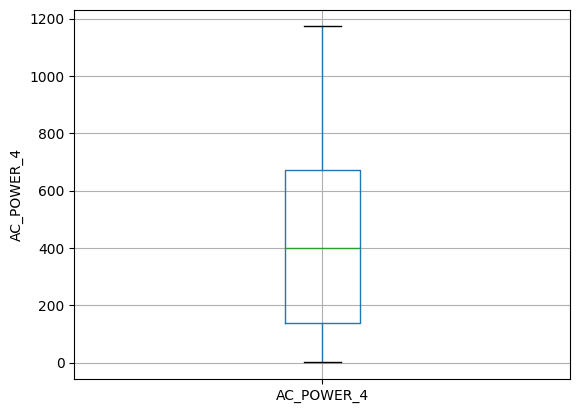

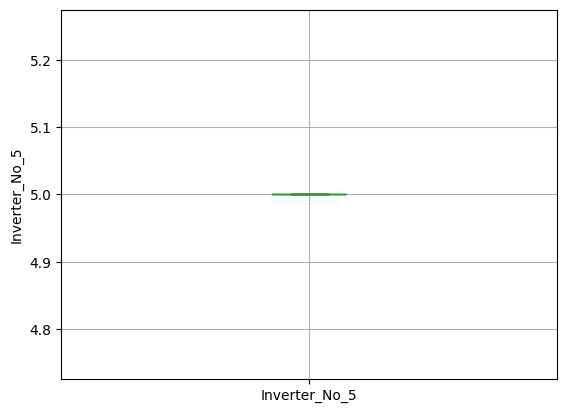

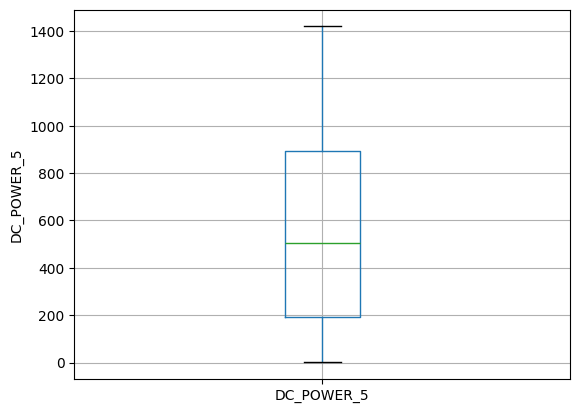

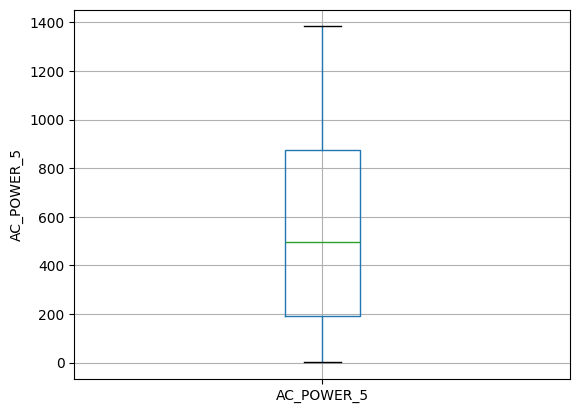

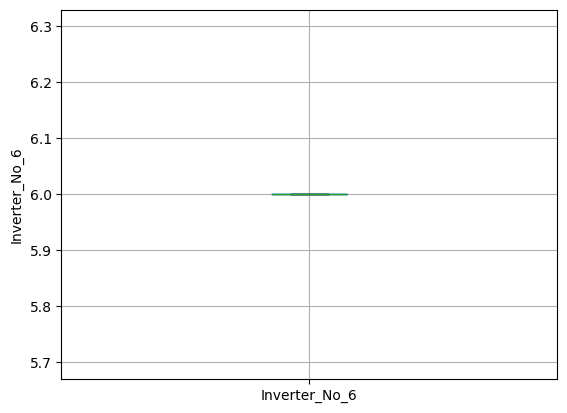

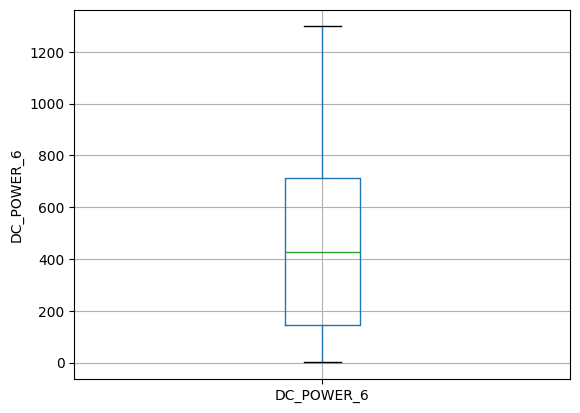

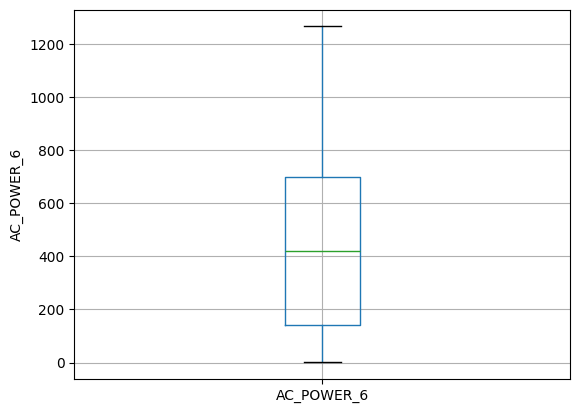

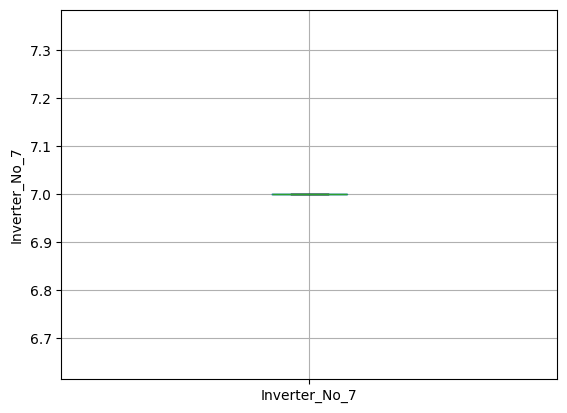

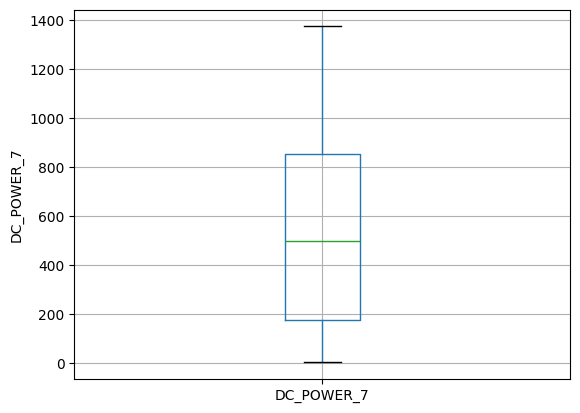

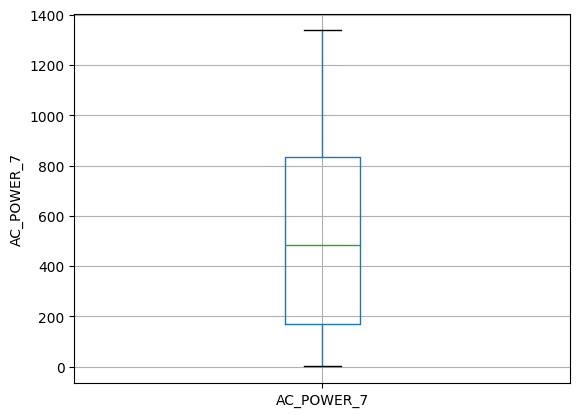

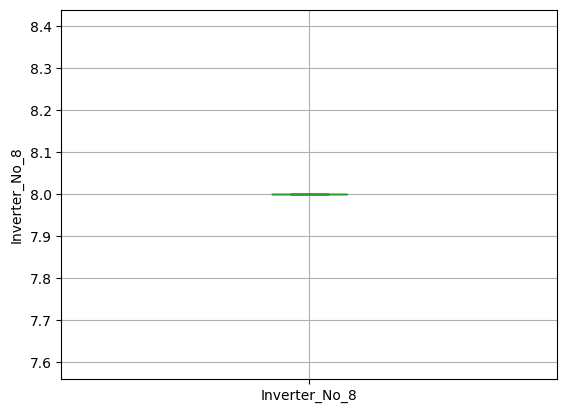

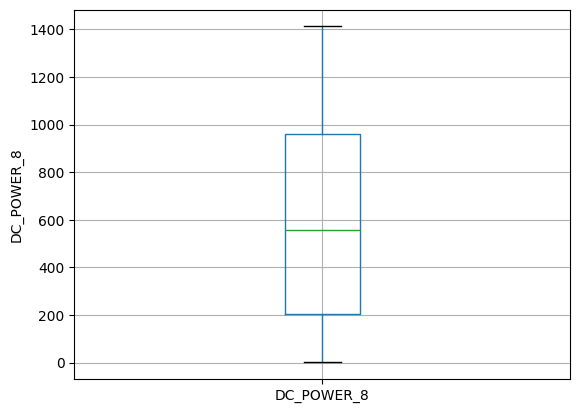

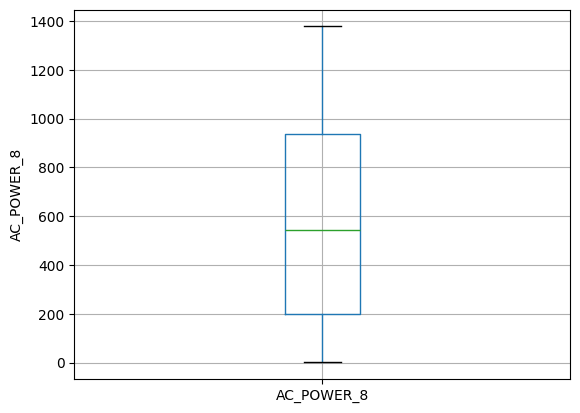

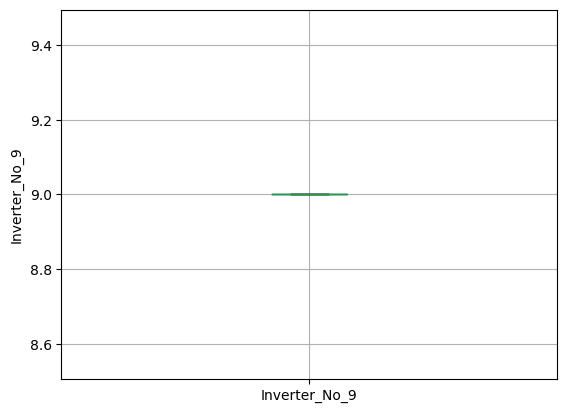

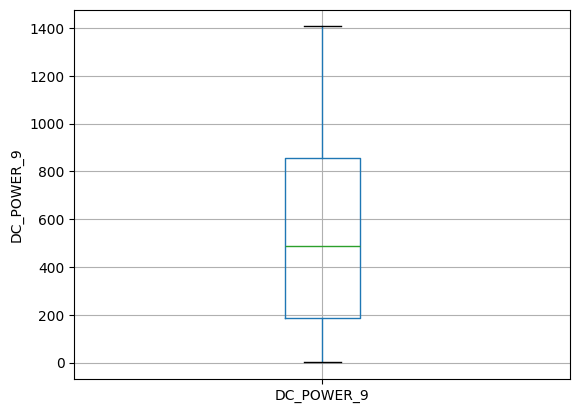

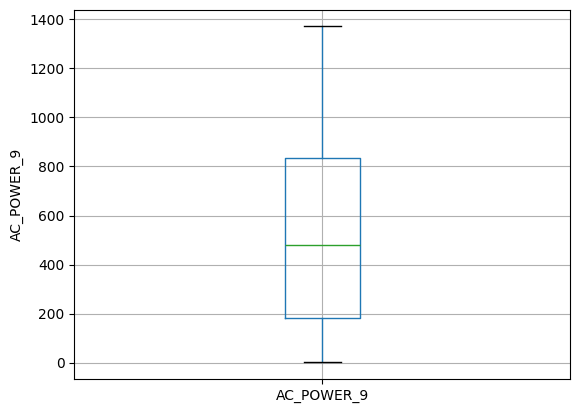

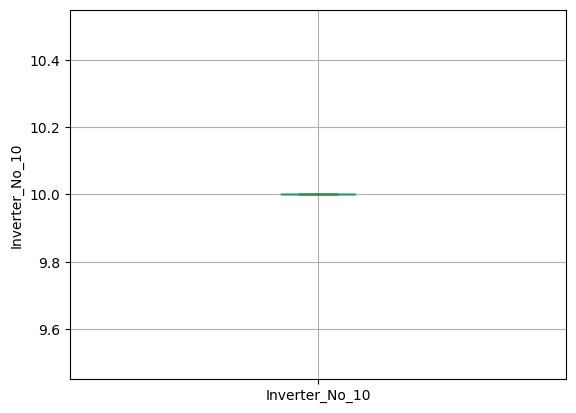

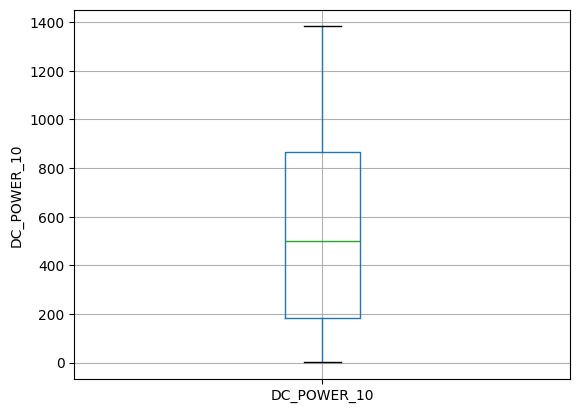

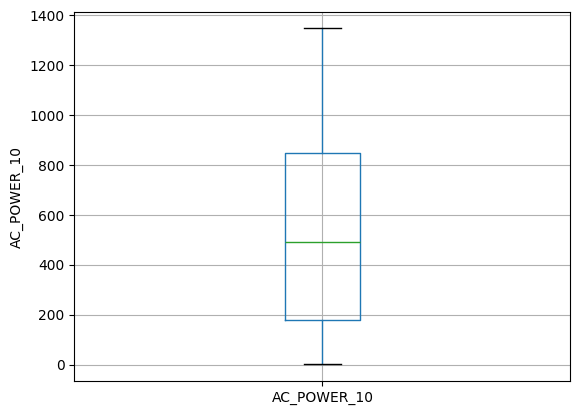

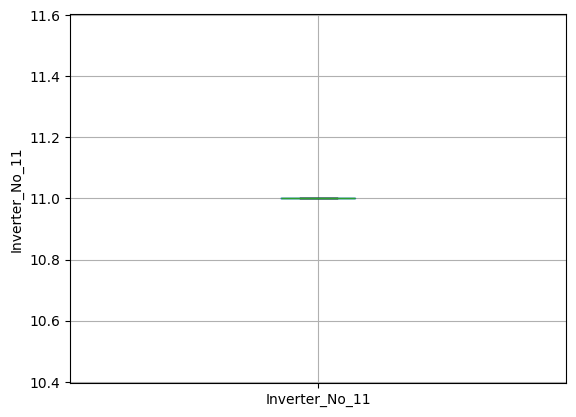

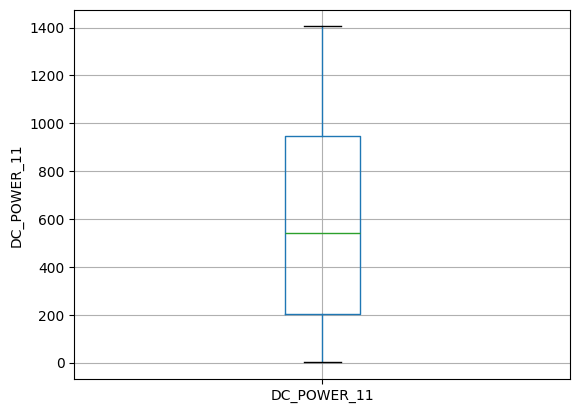

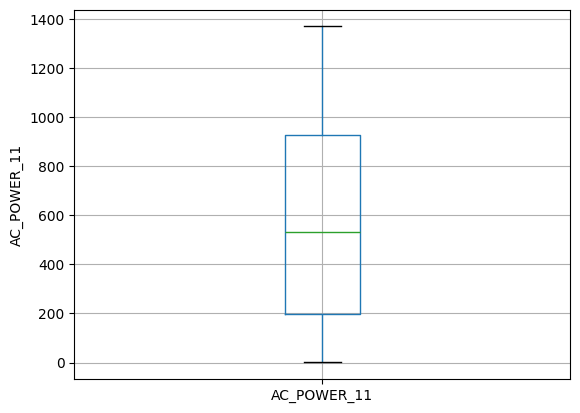

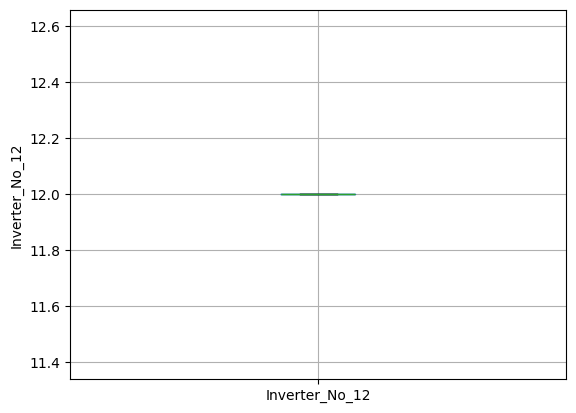

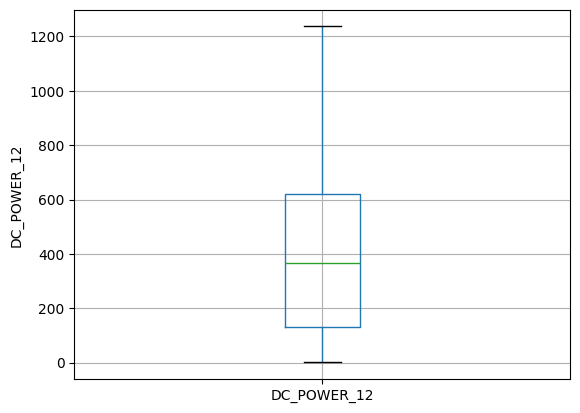

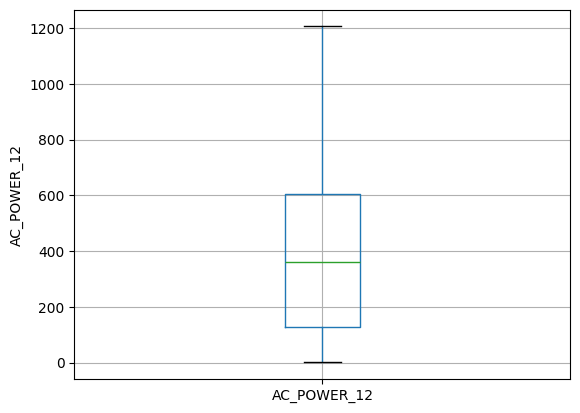

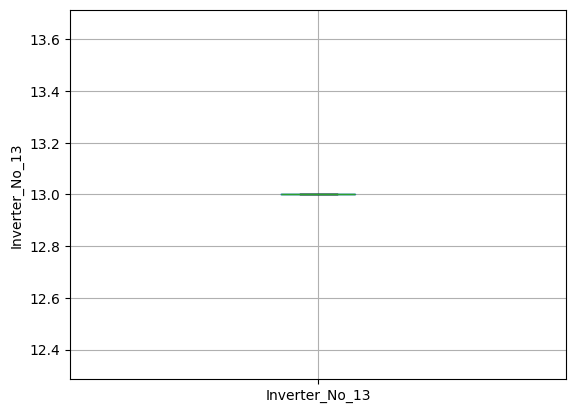

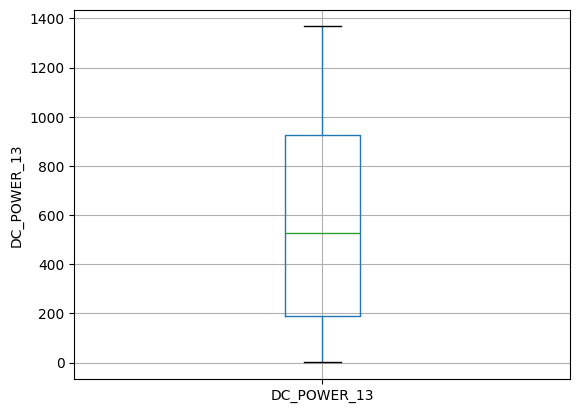

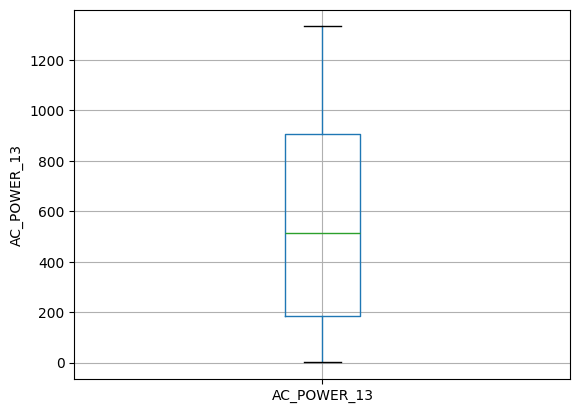

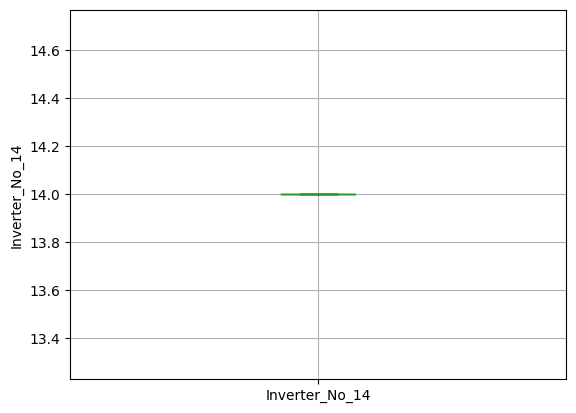

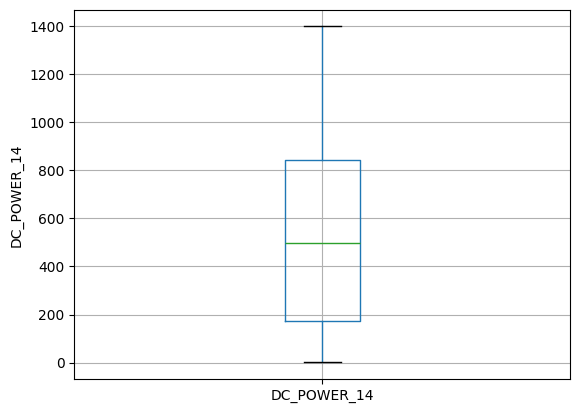

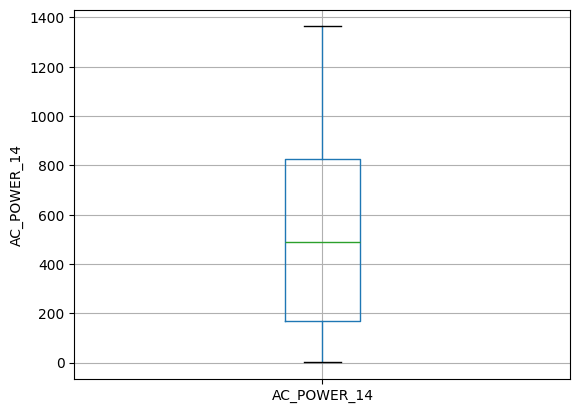

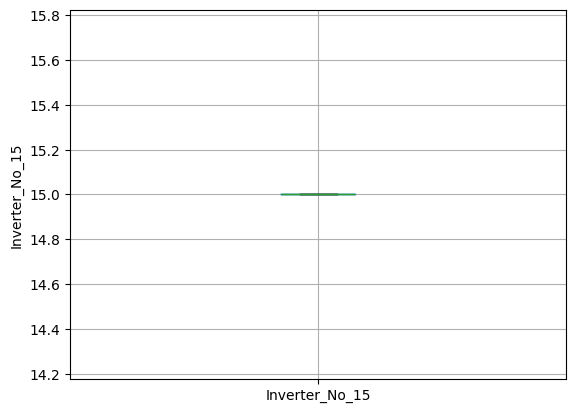

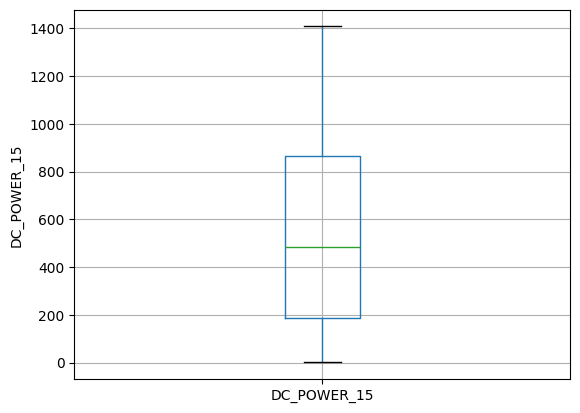

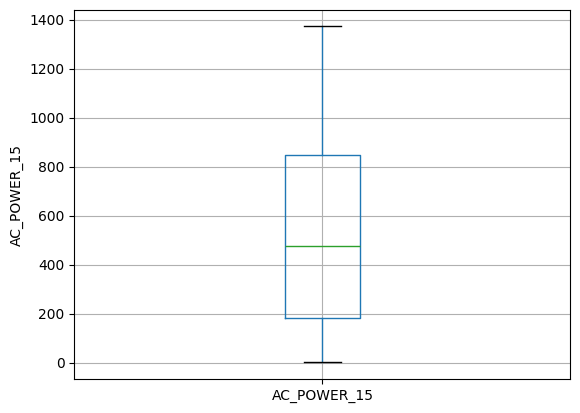

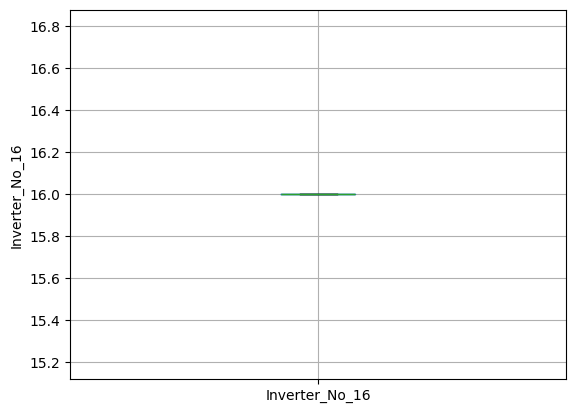

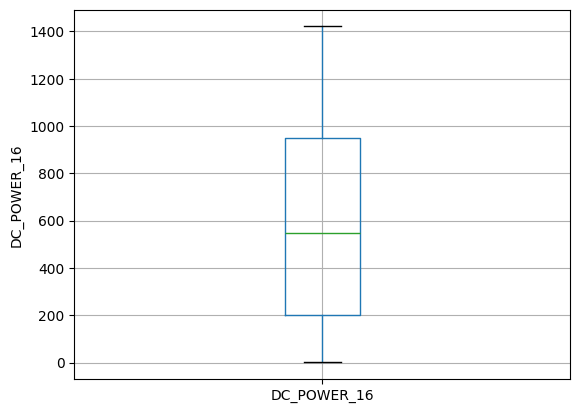

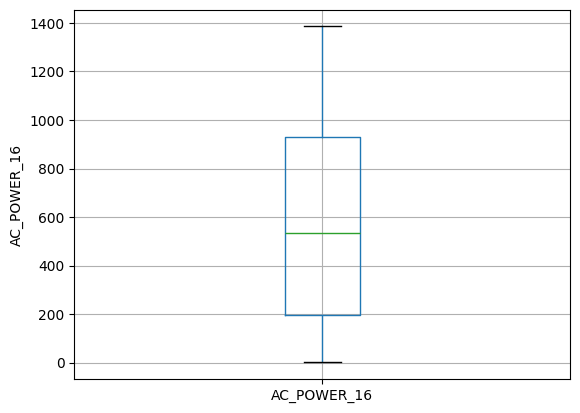

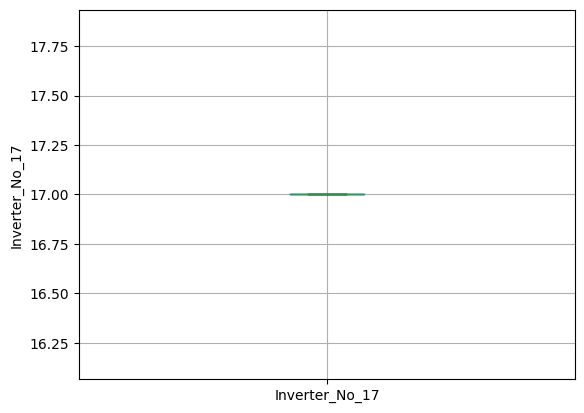

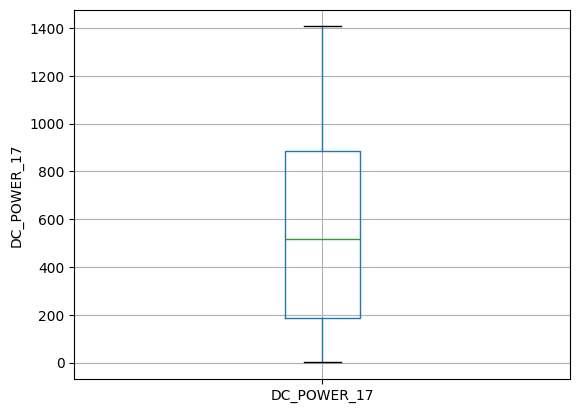

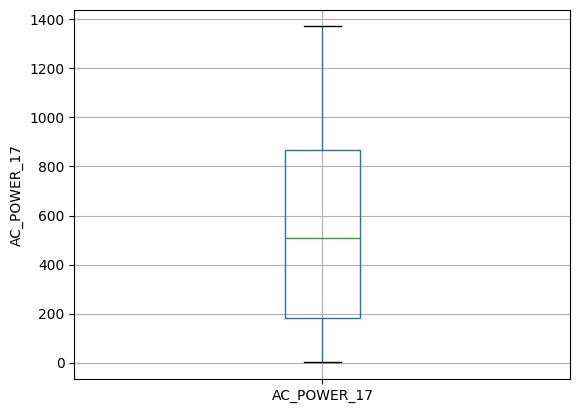

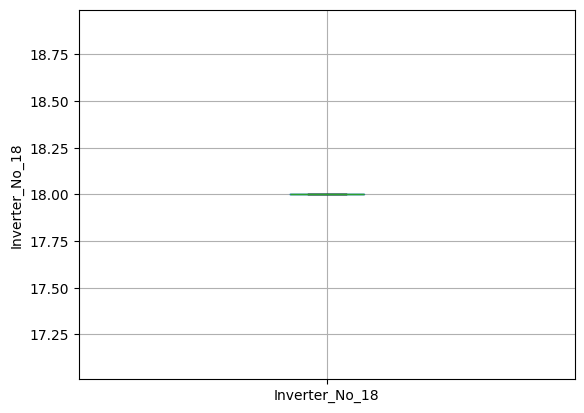

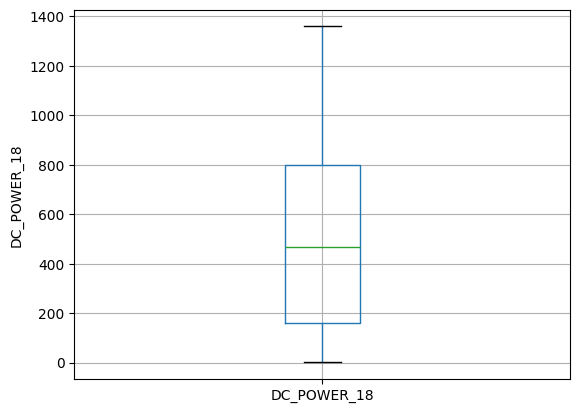

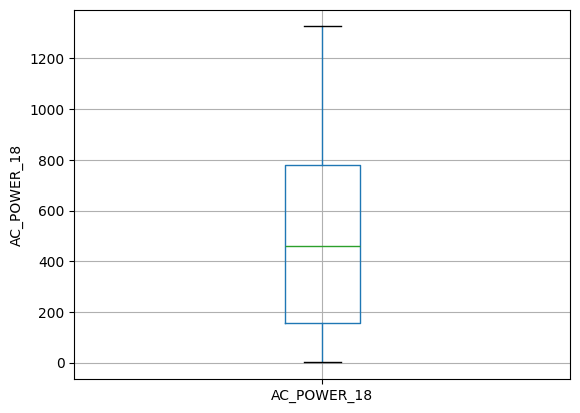

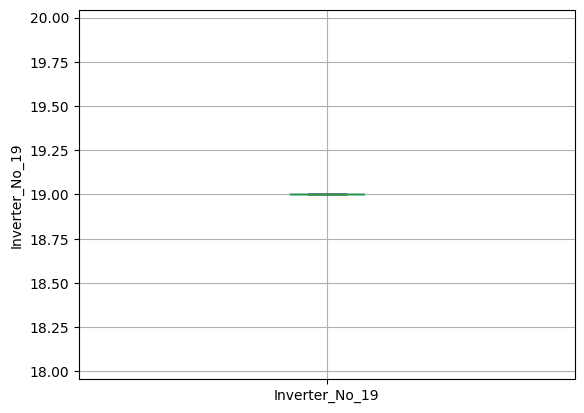

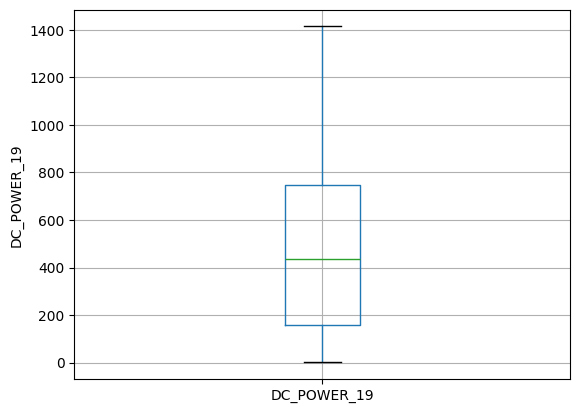

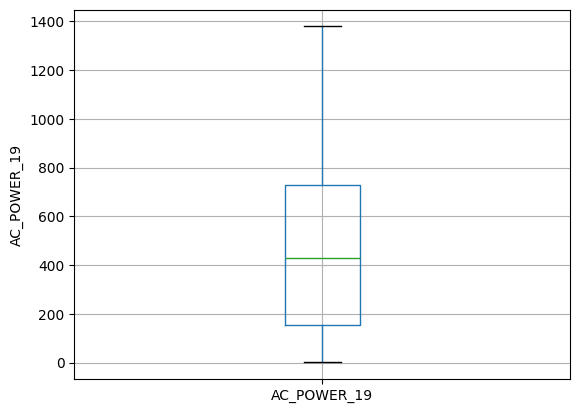

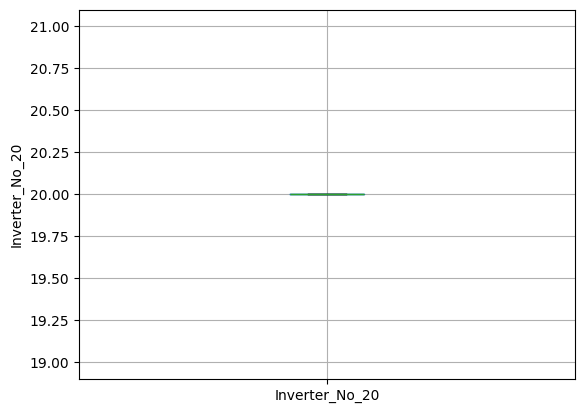

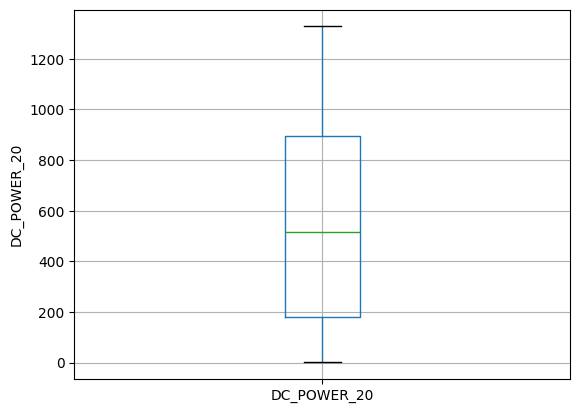

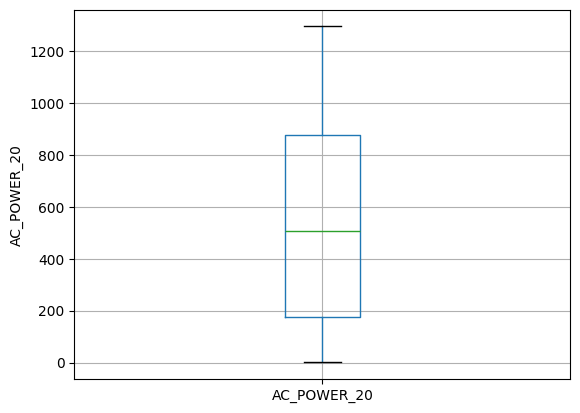

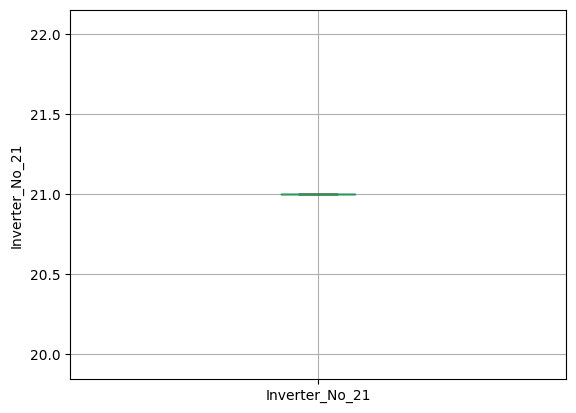

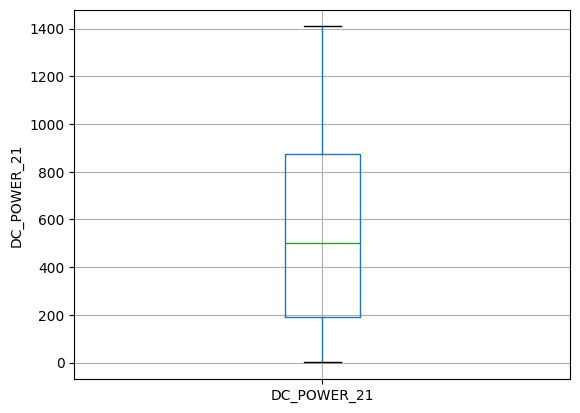

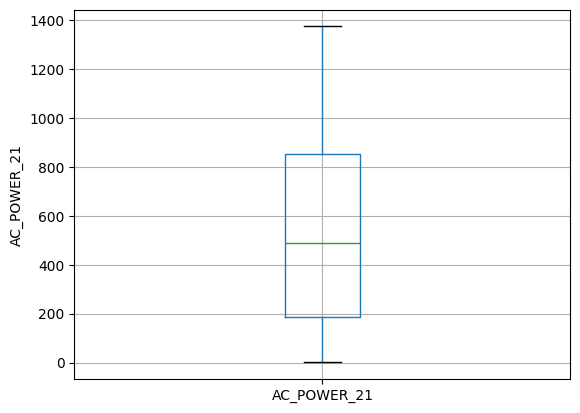

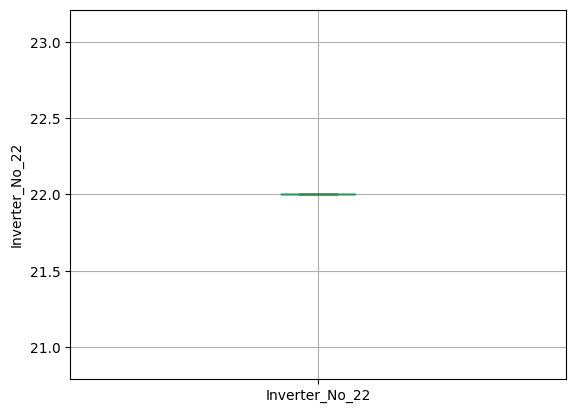

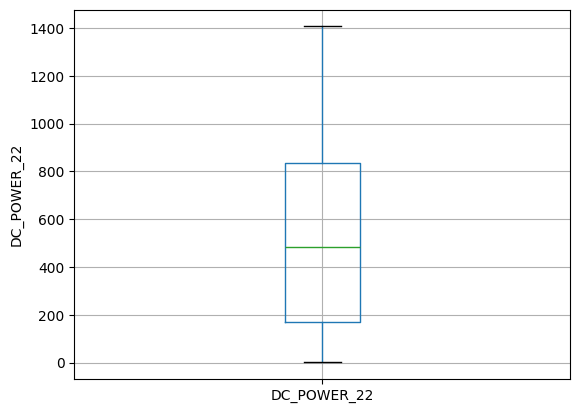

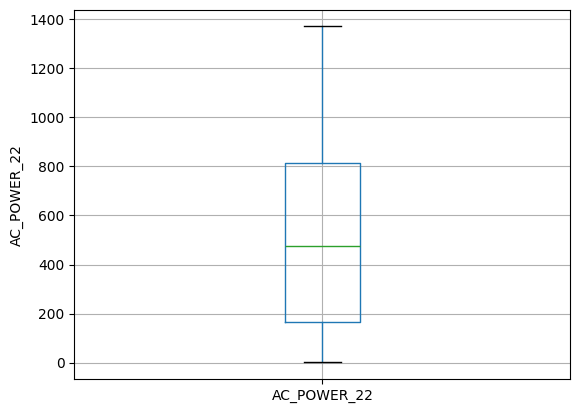

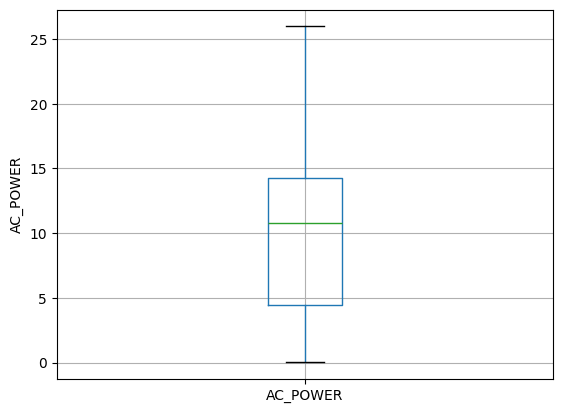

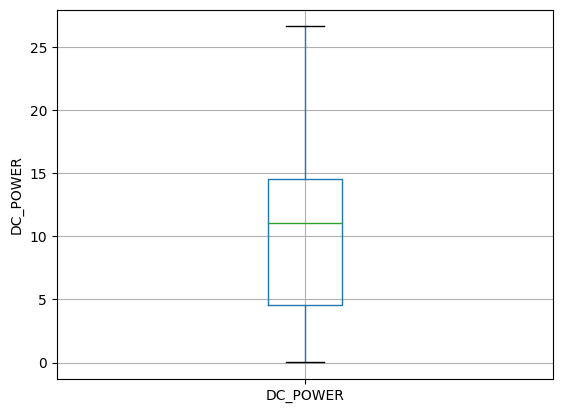

In [51]:
for feature in df_train.columns[3:]:
    # ignoring zero values for plotting
    df_train[df_train[feature]!=0].boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

<Axes: >

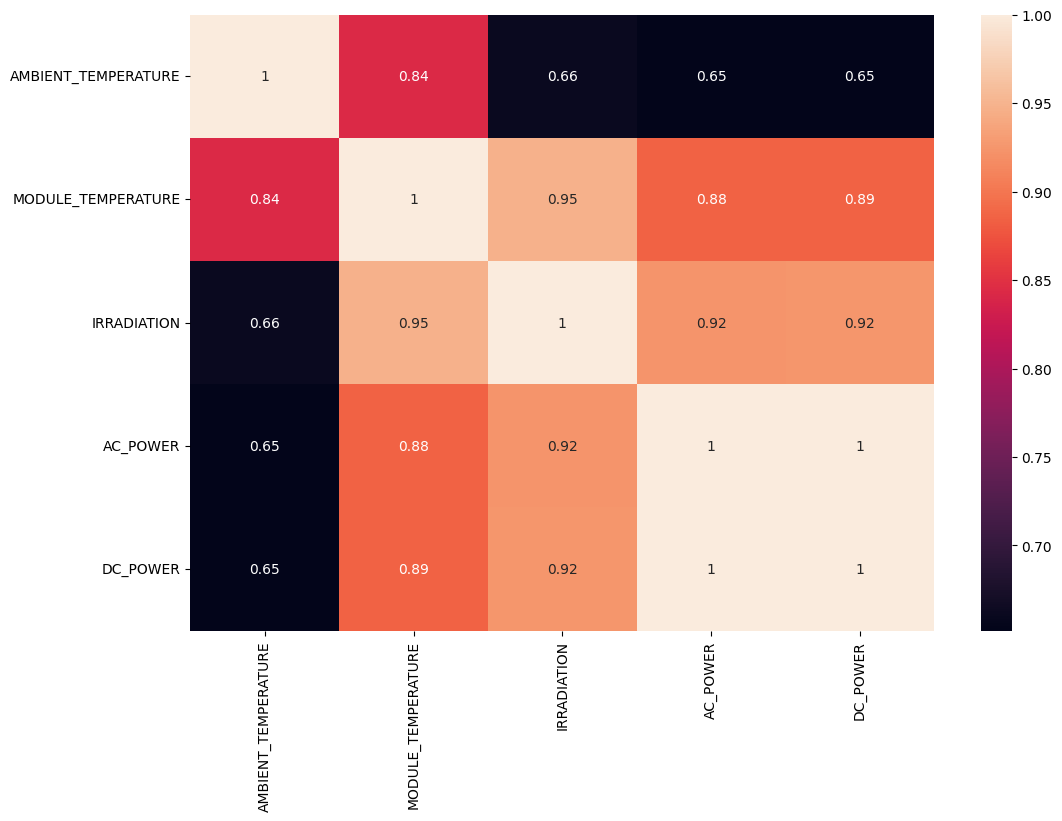

In [52]:
# display(df_train.iloc[:,1:].corr())
plt.figure(figsize = (12,8))
sns.heatmap(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'AC_POWER', 'DC_POWER']].corr(),annot=True)

In [53]:
df_train.drop('DC_POWER',axis=1,inplace=True)
percentile_dict = {}
for i in df_train.columns[3:]:
    a_list = []
    for j in [1,10,25,50,75,90,99,100]:
        a_list.append(round(np.percentile(df_train[i],j),2))
    percentile_dict[i] = a_list    
pd.DataFrame(pd.concat([pd.DataFrame({'Percentiles':[1,10,25,50,75,90,99,100]}),pd.DataFrame(percentile_dict)],axis=1))        
    


,Percentiles,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Inverter_No_1,DC_POWER_1,AC_POWER_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,...,Inverter_No_20,DC_POWER_20,AC_POWER_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,AC_POWER
0,1,22.55,21.10,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,0.00,22.0,0.00,0.00,0.00
1,10,23.66,22.40,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,0.00,22.0,0.00,0.00,0.00
2,25,24.73,23.76,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,0.00,22.0,0.00,0.00,0.00
3,50,27.24,27.79,0.02,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,0.00,22.0,0.00,0.00,0.46
4,75,31.55,41.75,0.46,1.0,535.66,525.04,2.0,402.93,395.81,...,20.0,482.34,473.00,21.0,312.62,307.05,22.0,426.71,418.87,11.23
5,90,34.61,52.28,0.80,1.0,1024.51,1000.20,2.0,871.89,853.11,...,20.0,961.87,939.29,21.0,844.76,826.37,22.0,883.88,864.01,15.28
6,99,37.40,60.32,0.96,1.0,1313.71,1280.86,2.0,1265.76,1234.17,...,20.0,1289.11,1256.91,21.0,1280.58,1248.68,22.0,1254.15,1223.16,19.54
7,100,39.18,66.64,1.10,1.0,1419.84,1384.35,2.0,1382.21,1347.66,...,20.0,1327.49,1294.30,21.0,1408.86,1373.65,22.0,1406.17,1371.01,25.98


In [54]:
outlier_imputer_dict = {}

for var in df_train.columns[3:]:
    percentile_dict = {}
    
    NinetyNine_percentile = np.percentile(df_train[var],99)  
       
    First_percentile = np.percentile(df_train[var],1)

    percentile_dict['99th'] =  NinetyNine_percentile
    percentile_dict['1st'] =  First_percentile  
    # Saving as dictionary for each column
    outlier_imputer_dict[var] = percentile_dict
      
#Saving the final dictionary         
np.save('outlier_imputer_dict',outlier_imputer_dict)    
def outlier_imputer(df):
    #Loading Outlier Imputer dictionary
    outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()
    
    for var in df.columns[3:]:
        
        df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']  
       
        df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st']
    
    return df

print(outlier_imputer_dict)

# #Applying imputation on Train & Test 


{'AMBIENT_TEMPERATURE': {'99th': 37.39861080172414, '1st': 22.546186481034482}, 'MODULE_TEMPERATURE': {'99th': 60.32299286206897, '1st': 21.099540196666666}, 'IRRADIATION': {'99th': 0.9607427385333338, '1st': 0.0}, 'Inverter_No_1': {'99th': 1.0, '1st': 1.0}, 'DC_POWER_1': {'99th': 1313.7053333333336, '1st': 0.0}, 'AC_POWER_1': {'99th': 1280.8573333333336, '1st': 0.0}, 'Inverter_No_2': {'99th': 2.0, '1st': 2.0}, 'DC_POWER_2': {'99th': 1265.7593333333336, '1st': 0.0}, 'AC_POWER_2': {'99th': 1234.1740000000002, '1st': 0.0}, 'Inverter_No_3': {'99th': 3.0, '1st': 3.0}, 'DC_POWER_3': {'99th': 1257.8207142857143, '1st': 0.0}, 'AC_POWER_3': {'99th': 1226.3635714285713, '1st': 0.0}, 'Inverter_No_4': {'99th': 4.0, '1st': 4.0}, 'DC_POWER_4': {'99th': 1152.2673333333337, '1st': 0.0}, 'AC_POWER_4': {'99th': 1124.6880000000006, '1st': 0.0}, 'Inverter_No_5': {'99th': 5.0, '1st': 5.0}, 'DC_POWER_5': {'99th': 1292.5068095238098, '1st': 0.0}, 'AC_POWER_5': {'99th': 1260.6280000000002, '1st': 0.0}, 'Inve

In [55]:
df_train = outlier_imputer(df_train)


In [18]:
df_test.drop(columns=['AC_POWER', 'DC_POWER'],inplace=True)
df_test = outlier_imputer(df_test)

In [20]:
#No. of bins
cut_blocks = [1,2,3,4,5,6,7,8]
#Bins range
cut_bins =[0, 12, 24, 36, 48, 60, 72, 84, 96]
#Assigning each row to a bin based on BLOCKS
df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)
display(df_train)

C:\Users\user\AppData\Local\Temp\ipykernel_12316\624753050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)


,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Inverter_No_1,DC_POWER_1,AC_POWER_1,Inverter_No_2,...,DC_POWER_20,AC_POWER_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,AC_POWER,BIN
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,1
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,1
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,1
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,1
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,92,2020-06-14,22:45,24.185657,22.922953,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,8
2967,93,2020-06-14,23:00,24.412542,23.356136,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,8
2968,94,2020-06-14,23:15,24.652915,23.913763,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,8
2969,95,2020-06-14,23:30,24.702391,24.185130,0.0,1.0,0.0,0.0,2,...,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0,0.0,8


In [32]:

#-----------------------------------X---------------------------------------------------------
#Importing models & Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


## Pipeline for different Regression models 
pipeline_lr = Pipeline([('lin_regression',LinearRegression())])
pipeline_dt = Pipeline([('dt_regression',DecisionTreeRegressor(random_state=0))])
pipeline_rf = Pipeline([('rf_regression',RandomForestRegressor(random_state=0))])
pipeline_ridge = Pipeline([('ridge_regression',Ridge(random_state=0))])
pipeline_lasso = Pipeline([('lasso_regression',Lasso(random_state=0))])



## Making a list of pipelines

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_ridge, pipeline_lasso]

best_rmse = 100.0
best_regressor = 0
best_pipeline = ""

## Dictionary of Pipelines and Regressor types for ease of reference
pipe_dict = {0:'Linear Regression',1: 'Decision Tree Regressor',2:'Random Forest Regressor',
             3:'Ridge Regressor',4:'Lasso Regressor',5:'XG Boost Regressor',6:'ANN Regressor'}


In [33]:
import warnings
warnings.filterwarnings("ignore")

# features to be used for training
useful_features = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']

from sklearn.model_selection import StratifiedKFold
# Splitting data into 8 folds 
skf = StratifiedKFold(n_splits=8, random_state=23, shuffle=True)
#Initializing kfold column
df_train['kfold'] = -1

# each row shall be assigned a fold no.based on 8 bins so that each fold will have equal representation of each bin
for fold,(train_indices, valid_indices) in enumerate(skf.split(X=df_train.iloc[:,:-1], y=df_train['BIN'])):
    df_train.loc[valid_indices, 'kfold'] = fold 

# Will iterate through all the Pipelines one by one
for j, model in enumerate(pipelines):
    
    RMSE = list()
    for i in range(8):    
        xtrain = df_train[df_train['kfold'] != i]
        xvalid = df_train[df_train['kfold'] == i]

        ytrain = xtrain.AC_POWER
        yvalid = xvalid.AC_POWER

        xtrain = xtrain[useful_features]
        xvalid = xvalid[useful_features]
        
        scaler = StandardScaler()
        scaler.fit_transform(xtrain)
        scaler.transform(xvalid)
        
        model.fit(xtrain, ytrain)
        rmse = np.sqrt(mean_squared_error(yvalid, model.predict(xvalid)))
        RMSE.append(rmse)
        
    # Mean of RMSE for all iterations for each model
    folds_mean_rmse = np.mean(RMSE)
    
    print('Mean Validation RMSE for {}: {}'.format(pipe_dict[j], folds_mean_rmse))
        
   # If mean of RMSE for all iterations reduces, call that model as the best & keep repeating 
    # to get the best model
    if folds_mean_rmse < best_rmse:
        best_rmse = folds_mean_rmse
        best_pipeline = model
        best_regressor = j

print('\n\nRegressor with least RMSE:  {}'.format(pipe_dict[best_regressor]))
print(best_pipeline)



Mean Validation RMSE for Linear Regression: 2.3738425616651613
Mean Validation RMSE for Decision Tree Regressor: 2.3501314272965277
Mean Validation RMSE for Random Forest Regressor: 1.7376866079036648
Mean Validation RMSE for Ridge Regressor: 2.3774000818909724
Mean Validation RMSE for Lasso Regressor: 2.79253288897248


Regressor with least RMSE:  Random Forest Regressor
Pipeline(steps=[('rf_regression', RandomForestRegressor(random_state=0))])


In [34]:
#Splitting train into x & y
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_train = df_train[['AC_POWER']]

# Random grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train, y_train)

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

rf_model = RandomForestRegressor(n_estimators= 1100, min_samples_split= 14, min_samples_leaf= 8, 
                                max_features= 'auto', max_depth= 10, criterion= 'mse')
# Fitting on train set 
rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


ValueError: 
All the 500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'absolute_error', 'friedman_mse', 'poisson'}. Got 'mse' instead.

--------------------------------------------------------------------------------
116 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'squared_error', 'friedman_mse', 'poisson'}. Got 'mse' instead.

--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'squared_error', 'friedman_mse', 'absolute_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'poisson', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
93 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'friedman_mse', 'absolute_error', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'friedman_mse', 'squared_error', 'poisson'}. Got 'mse' instead.


In [36]:
# Splitting train into x & y
x_train = df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y_train = df_train[['AC_POWER']]

# Random grid
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = [None, 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['squared_error']  # Corrected criterion
}

# Import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest model
rf = RandomForestRegressor()

# Randomized Search CV
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, verbose=2, random_state=100, n_jobs=-1)
rf_randomcv.fit(x_train, y_train)

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

# Using the best parameters to create the final model
rf_model = RandomForestRegressor(
    n_estimators=1100,
    min_samples_split=14,
    min_samples_leaf=8,
    max_features='sqrt',  # Example: Adjust based on best parameters from RandomizedSearchCV
    max_depth=10,
    criterion='squared_error'  # Corrected criterion
)

# Fitting on the train set
rf_model.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 450, 'criterion': 'squared_error'}


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=14, n_estimators=1100)

In [56]:
#Splitting into train and test
x_test = df_test[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y_test = df_test[['AC_POWER']]

#Predicting for x_test
y_pred_rf = rf_model.predict(x_test)

print(f'Root Mean Squared Error for Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}')


Root Mean Squared Error for Test Data: 1.9298704914358729


In [58]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf.columns=['AC_Prediction']

actual_vs_pred = pd.concat([y_pred_rf,y_test.reset_index(drop=True)],axis=1)
actual_vs_pred.columns = ['Prediction(MW)','Actual(MW)']

In [61]:
actual_vs_pred

,Prediction(MW),Actual(MW)
0,0.050967,0.0
1,0.091937,0.0
2,0.090759,0.0
3,0.095884,0.0
4,0.124258,0.0
...,...,...
283,0.017454,0.0
284,0.016628,0.0
285,0.027464,0.0
286,0.023971,0.0


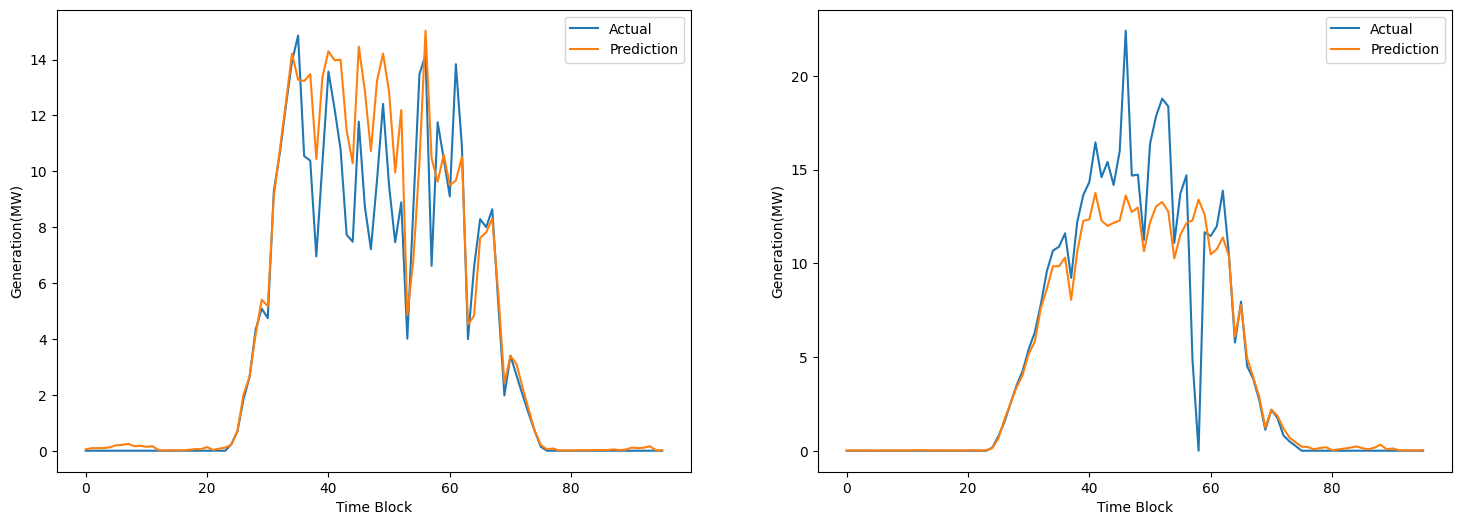

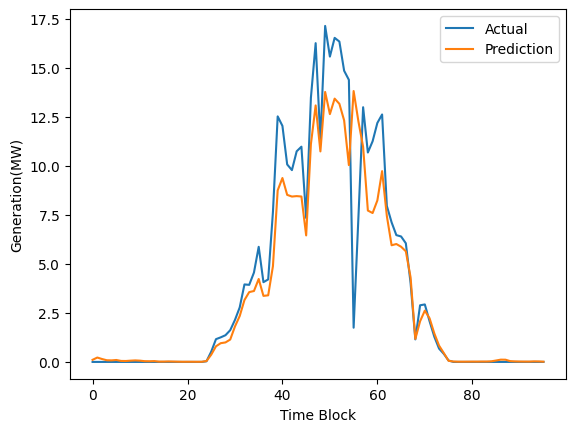

In [59]:
# For Plot 1
f = plt.figure(figsize=(18,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

# Day 1
ax1.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][0:96].reset_index(drop=True))
ax2.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96:96*2].reset_index(drop=True))
ax1.set_xlabel('Time Block')
ax1.set_ylabel('Generation(MW)')
# Day 2
ax2.set_xlabel('Time Block')
ax2.set_ylabel('Generation(MW)')
ax1.legend(['Actual','Prediction'])
plt.legend(['Actual','Prediction'])
plt.show()
# Day 3 
plt.plot(actual_vs_pred[['Actual(MW)','Prediction(MW)']][96*2:96*3].reset_index(drop=True))
plt.xlabel('Time Block')
plt.ylabel('Generation(MW)')
plt.legend(['Actual','Prediction'])
plt.show();